# Notebook for plotting figures to compare the 2020 and 2024 estimates by Rhodium Group for US CCS Capacity

### Comments on data used
These comments are duplicated from the README page of the associated .xlsx file, below.
Data here are compiled from several Rhodium Group reports:
1. [Opportunities for Advancing Industrial Carbon Capture (Sep 10, 2020)](https://rhg.com/research/industrial-carbon-capture/)
   * Data taken from Figures 3 and 4, which are labeled as reporting 'Million metric tons of annual CO2 capture capacity *additions*' for both a 'low cost' and 'high cost' scenario (identified as situations in which CCS implementation costs are 'low' and 'high')
2. [Expanding the Industrial Decarbonization Toolkit (May 16, 2024)](https://rhg.com/research/expanding-the-industrial-decarbonization-toolkit/)
   * Data taken from Figure 3, which is labeled as reporting 'Million metric tons of capture capacity per year' for 'low', 'mid', and 'high' scenarios that authors report are defined in 'Taking Stock 2023' (see item 3, below). In this document, they briefly describe the scenarios as: (1) Low: low costs of 'clean energy' and high fossil fuel prices; (2) High: high costs of 'clean energy' and low fossil fuel prices; (3) Mid: 'splitting the difference' between the two prior scenarios
3. [Taking Stock 2023: US Emissions Projections after the Inflation Reduction Act (Jul 20,2023)](https://rhg.com/wp-content/uploads/2023/07/Taking-Stock-2023_Rhodium-Group.pdf)
   * Notably, on p. 25 of this report, the authors describe a 'low', 'mid', and 'high' scenario only in terms of the price of CCS capture, transport, and storage costs; i.e., they do not mention anything about fossil fuel prices.
  
### Potential inconsistencies affecting comparisons between reports
- In the 2020 report ((1) above), RHG does not say what assumptions they make regarding fossil fuel prices; they only specify that the 'Low Cost' and 'High Cost' scenarios correspond to low and high cost for CCS implementation. Fossil fuel prices substantially affect whether use of CO2 for EOR is profitable.
- 2024 report includes Ethelene, Iron/Steel plants (which 2020 report did not) -- these come into play for the 2035 and 2040 estimates in the low-cost case
- Figure 3 in the 2024 report labels CCS capcity in units of (implied) total MMt/yr CCS capture capacity; however, the figures in the 2020 report are identified in units of 'MMt/yr capacity _**additions**_'. It is not clear whether the totals take into account the already-in-operation ~20 MMt/yr US CCS capacity. If it's a typo, the two reports are apples-to-apples; if it's NOT a typo, then the drop in forecast CCS emisisons is more substantial.





In [8]:
# make the code pretty
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


#### Load libraries, specify path to data

In [9]:
# path to Excel file containing RHG estimates extracted from report figures
RHG_DATA_PATH = "/Volumes/Samsung_T5/data/ccs/rhg_report_estimates.xlsx"
sheet_name = "rhg_report_estimates"  # sheet with data


import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# live on the edge of data science hell: ignore warnings
import warnings

warnings.filterwarnings("ignore")

#### Load data

In [10]:
xls = pd.ExcelFile(RHG_DATA_PATH)
df = pd.read_excel(xls, sheet_name)

#### Set up plot prettification arrays/helpers

In [11]:
# order of scenarios if we assume the 2020 data are actually cumulative (i.e., there is a typo in the figure legends)
hue_order_cumulative = [
    "High-cost CCS: 45Q thru 2028 (RHG 2020 report)",
    "Low-cost CCS: 45Q thru 2028 (RHG 2020 report)",
    "High-cost CCS: 45Q made permanent (RHG 2020 report)",
    "Low-cost CCS: 45Q made permanent (RHG 2020 report)",
    "High-cost CCS: 45Q through 2033 (RHG 2024 report)",
    "Medium-cost CCS: 45Q through 2033 (RHG 2024 report)",
    "Low-cost CCS: 45Q through 2033 (RHG 2024 report)",
]

# order of scenarios if we assume the 2020 data are, as labeled, 'additional'
hue_order_additional = [
    "High-cost CCS: 45Q thru 2028 (RHG 2020 report [assumed additional])",
    "Low-cost CCS: 45Q thru 2028 (RHG 2020 report [assumed additional])",
    "High-cost CCS: 45Q made permanent (RHG 2020 report [assumed additional])",
    "Low-cost CCS: 45Q made permanent (RHG 2020 report [assumed additional])",
    "High-cost CCS: 45Q through 2033 (RHG 2024 report)",
    "Medium-cost CCS: 45Q through 2033 (RHG 2024 report)",
    "Low-cost CCS: 45Q through 2033 (RHG 2024 report)",
]
colors = [
    "lightblue",
    "lightblue",
    "royalblue",
    "royalblue",
    "tab:red",
    "tab:red",
    "tab:red",
]
linestyles = [
    "-",
    ":",
    "-",
    ":",
    "-",
    "--",
    ":",
]

#### Figures

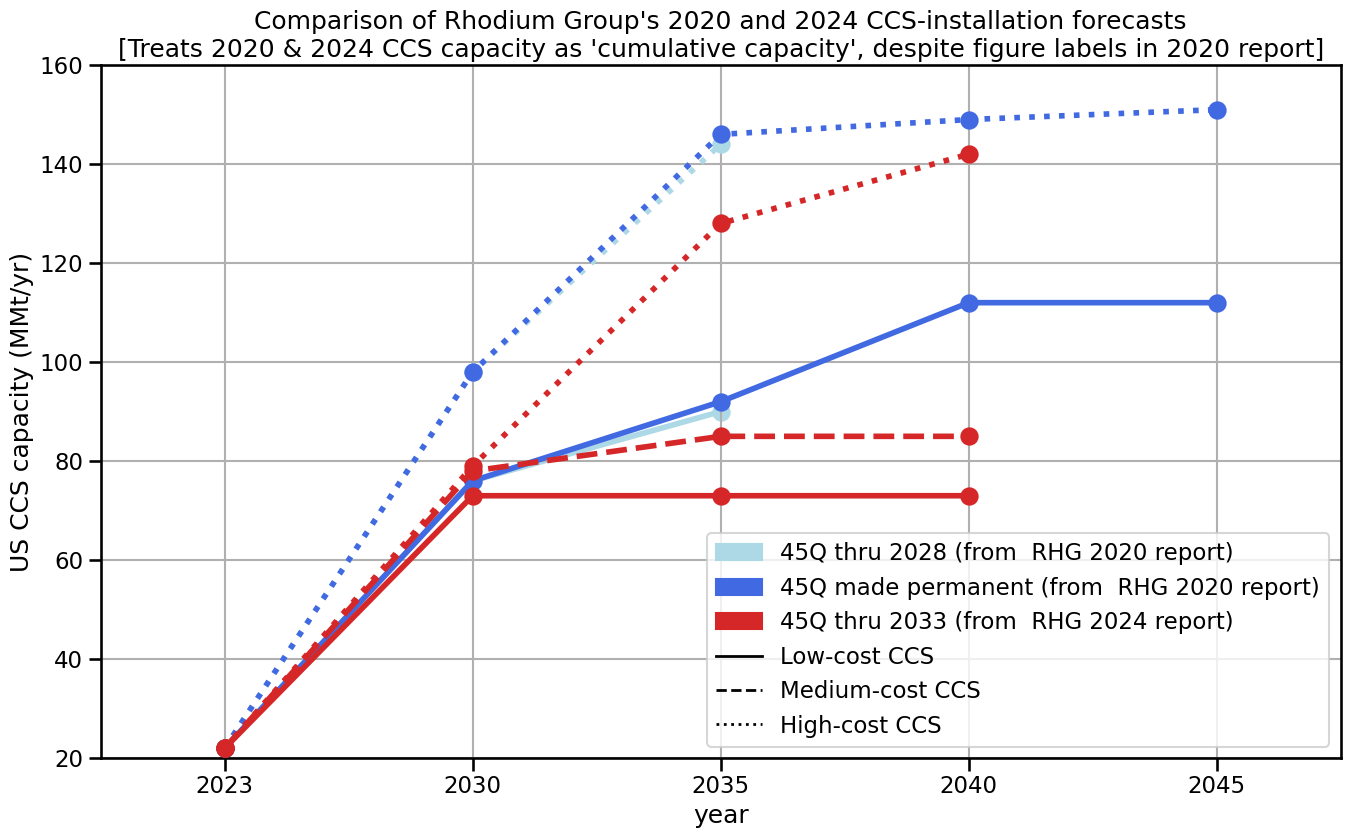

In [5]:
# Figure showing all three Rhodium cases including 2023 total US CCS capacity,
# treating all CCS capacity numbers as cumulative
# (i.e., we're assuming the 2020 report has a typo and its numbers are actually directly
# comparable to the 2024)

sns.set_context("talk")
linewidth = 2
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.subplot(1, 1, 1)
sns.pointplot(
    data=df.loc[df["scenario_description"].isin(hue_order_cumulative)],
    x="year",
    y="MMt_per_yr_capacity",
    hue="scenario_description",
    linestyles=linestyles,
    ax=ax,
    hue_order=hue_order_cumulative,
    palette=colors,
)
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

handles, labels = plt.gca().get_legend_handles_labels()
# create manual symbols for legend
handles = [
    mpatches.Patch(color="lightblue", label="45Q thru 2028 (from  RHG 2020 report)"),
    mpatches.Patch(
        color="royalblue", label="45Q made permanent (from  RHG 2020 report)"
    ),
    mpatches.Patch(color="tab:red", label="45Q thru 2033 (from  RHG 2024 report)"),
    Line2D([0], [0], label="Low-cost CCS", linestyle="-", color="k", lw=linewidth),
    Line2D([0], [0], label="Medium-cost CCS", linestyle="--", color="k", lw=linewidth),
    Line2D([0], [0], label="High-cost CCS", linestyle=":", color="k", lw=linewidth),
]

plt.ylabel("US CCS capacity (MMt/yr)")
plt.ylim([20, 160])
plt.legend(handles=handles)
plt.title(
    "Comparison of Rhodium Group's 2020 and 2024 CCS-installation forecasts\n[Treats 2020 & 2024 CCS capacity as 'cumulative capacity', despite figure labels in 2020 report]"
)

plt.grid()

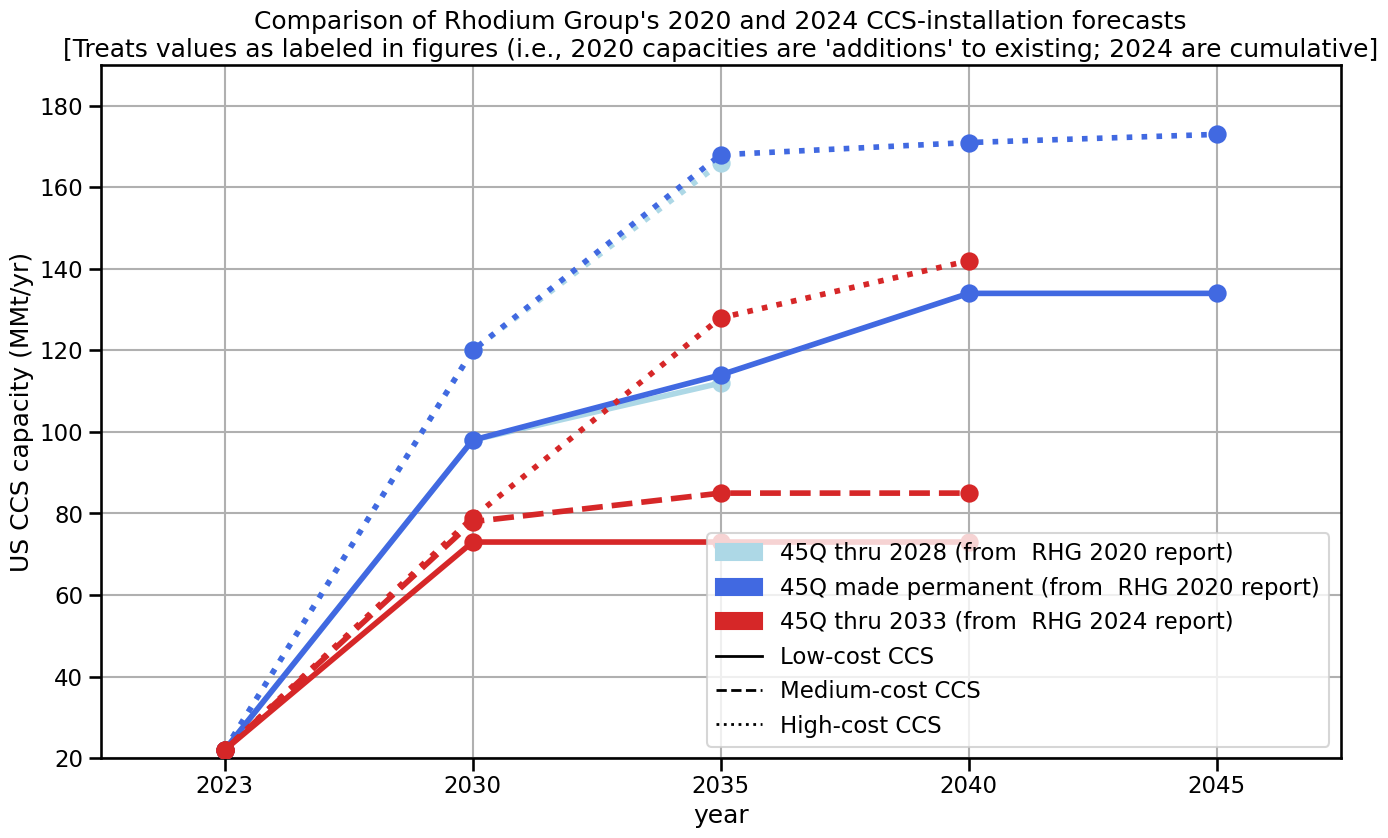

In [6]:
# Figure showing all three Rhodium cases including 2023 total US CCS capacity,
# treating the 2024 numbers as cumulative and the 2020 numbers as additive
# (i.e., we're using the numbers exactly as the figure-title/labels describe them

sns.set_context("talk")
linewidth = 2
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
plt.subplot(1, 1, 1)
sns.pointplot(
    data=df.loc[df["scenario_description"].isin(hue_order_additional)],
    x="year",
    y="MMt_per_yr_capacity",
    hue="scenario_description",
    linestyles=linestyles,
    ax=ax,
    hue_order=hue_order_additional,
    palette=colors,
)
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

handles, labels = plt.gca().get_legend_handles_labels()
# create manual symbols for legend
handles = [
    mpatches.Patch(color="lightblue", label="45Q thru 2028 (from  RHG 2020 report)"),
    mpatches.Patch(
        color="royalblue", label="45Q made permanent (from  RHG 2020 report)"
    ),
    mpatches.Patch(color="tab:red", label="45Q thru 2033 (from  RHG 2024 report)"),
    Line2D([0], [0], label="Low-cost CCS", linestyle="-", color="k", lw=linewidth),
    Line2D([0], [0], label="Medium-cost CCS", linestyle="--", color="k", lw=linewidth),
    Line2D([0], [0], label="High-cost CCS", linestyle=":", color="k", lw=linewidth),
]

plt.ylabel("US CCS capacity (MMt/yr)")
plt.ylim([20, 190])
plt.legend(handles=handles)
plt.title(
    "Comparison of Rhodium Group's 2020 and 2024 CCS-installation forecasts\n[Treats values as labeled in figures (i.e., 2020 capacities are 'additions' to existing; 2024 are cumulative]"
)
plt.grid()